In [1]:
import pandas as pd
import sys, os
import binotools as bt

# Quickly plot 2D and 1D spectra from Binospec

# Load slit table

In [10]:
# Load slit csv file (output from Binomask)
slits = pd.read_csv('../BLAS_config/BLAS_1_slits.csv')
print(slits.shape)
# fits file ext # = slits.index + 1
slits['extnum'] = slits.index + 1

slits[slits.priority == 1.]

(174, 14)


,slit,targetnum,name,ra,dec,pmra,pmdec,mag,priority,epoch,type,wave_start,wave_end,side,extnum
15,3,10,Stark11_43_3982,189.039261,62.247654,0,0,0.001,1,2000,TARGET,7718.780538,10241.372704,A,16
19,255,1916,f_3,188.910191,62.352588,0,0,0.001,1,2000,STANDARD,6855.558347,9378.533932,A,20
20,254,1915,f_2,188.902346,62.363999,0,0,0.001,1,2000,STANDARD,6773.112436,9296.124509,A,21
49,4,11,Jung18_z6_GND_5752,189.199585,62.320965,0,0,0.001,1,2000,TARGET,7592.815993,10115.463032,A,50
63,1,7,Hu10_z6_4,189.253998,62.353954,0,0,0.001,1,2000,TARGET,7509.007141,10031.694313,A,64
64,2,8,Stark11_35_22248,189.253998,62.353954,0,0,0.001,1,2000,TARGET,7509.007141,10031.694313,A,65
65,5,19,Stark11_35_22381,189.255386,62.357750,0,0,0.001,1,2000,TARGET,7489.939970,10012.635887,A,66
78,6,9,Hu10_z6_3,189.055939,62.129990,0,0,0.001,1,2000,TARGET,7402.424921,9925.164452,B,79
83,13,23,Stark11_42_6706,189.079712,62.141884,0,0,0.001,1,2000,TARGET,7421.763890,9944.492681,B,84
89,12,22,Stark11_41_13100,189.156693,62.115440,0,0,0.001,1,2000,TARGET,7115.139790,9638.003378,B,90


# Load 2D spectra file

In [3]:
datadir = os.environ['BINO_DIR']+'2649_BLAS_1a_2019.0208/2019.0208_red_4hrs_190219/'

slits_data_file = datadir+"obj-sky_slits_lin.fits"

# Get y position

In [7]:
fdark = datadir+'calib/obj_dark.fits'
target_offset_px = bt.bino_get_obj_ypos(fdark)

In [8]:
# Load data
bino_plot = bt.BinoPlotter(slits_data_file)

# Plots

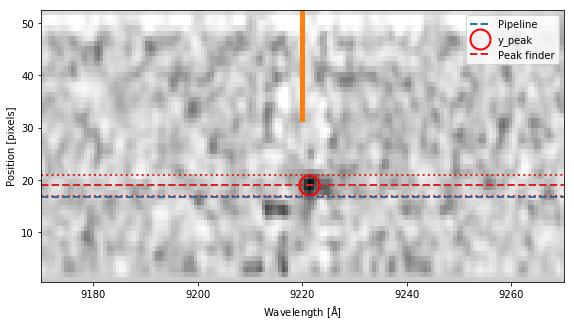

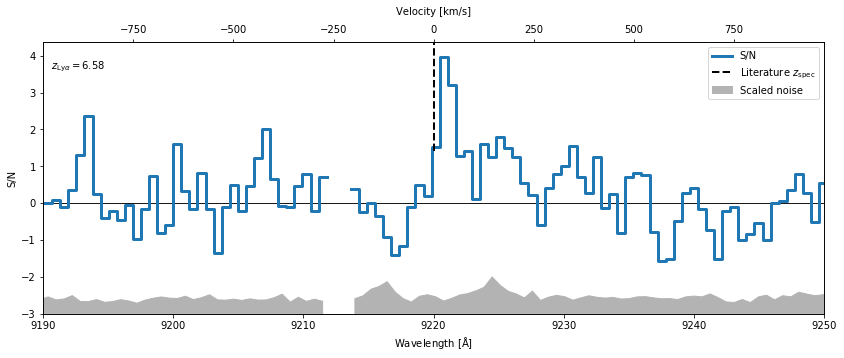

In [15]:
# Line to center on
Lya_wave   = 9220 #9188. # Wavelength to center on
posy_width = 4.    # Pixel width of extraction window for 1D spectrum (4 pix = PSF from stars ~1")
wave_limA  = 30.   # Wavelength range to plot over (Lya_wave /pm wave_limA)

targetid = 50 #144 # slit number ( mask id + 1)

image, ypos = bino_plot.spec2D(target=targetid, wave_lineA=Lya_wave, posy_width=posy_width,
                               vmin_sig=-0.3, vmax_sig=0.7, wave_limA=50., posy=target_offset_px[targetid-1],
                               smooth=1.)

bino_plot.spec1D(image, wave_lineA=Lya_wave,
                 posy_med=ypos, posy_width=posy_width, wave_limA=wave_limA,
                 StoN=True)